# Data Exploration

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("significant_eq_database.csv", sep=';', on_bad_lines='skip')

In [19]:
data.head()

,ID Earthquake,Flag Tsunami,Year,Month,Day,Focal Depth,EQ Primary,Mw Magnitude,Ms Magnitude,Mb Magnitude,...,Total Effects : Missing Description,Total Effects : Injuries,Total Effects : Injuries Description,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Total Effects : Houses Destroyed,Total Effects : Houses Destroyed Description,Total Effects : Houses Damaged,Total Effects : Houses Damaged Description,Coordinates
0,78,NaN,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"41.2,19.3"
1,84,Tsunami,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),NaN,NaN,NaN,NaN,"40.3,26.5"
2,9989,Tsunami,346,NaN,NaN,NaN,6.8,NaN,6.8,NaN,...,NaN,NaN,NaN,NaN,MODERATE (~$1 to $5 million),NaN,Many (~101 to 1000 houses),NaN,NaN,"41.4,19.4"
3,110,NaN,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"35.5,25.5"
4,9971,Tsunami,557,NaN,NaN,NaN,7.0,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40.9,27.6"


In [20]:
data.isna().sum()

ID Earthquake                                      0
Flag Tsunami                                    4370
Year                                               0
Month                                            408
Day                                              562
Focal Depth                                     2965
EQ Primary                                      1792
Mw Magnitude                                    4874
Ms Magnitude                                    3278
Mb Magnitude                                    4404
Ml Magnitude                                    6024
MFA Magnitude                                   6194
Unknown Magnitude                               5431
Intensity                                       3382
Country                                            0
State                                           5885
Location name                                      1
Region code                                        1
Earthquake : Deaths                           

In [21]:
len(data)

6208

In [22]:
data.isnull().groupby(["Earthquake : Deaths", "Earthquake : Missing", "Earthquake : Injuries", "Earthquake : Damage (in M$)"]).size()

Earthquake : Deaths  Earthquake : Missing  Earthquake : Injuries  Earthquake : Damage (in M$)
False                False                 False                  False                            13
                                                                  True                              8
                     True                  False                  False                           263
                                                                  True                            582
                                           True                   False                           127
                                                                  True                           1076
True                 True                  False                  False                            57
                                                                  True                            321
                                           True                   False                   

In [23]:
# Let's look at data where Earthquake : Damage (in M$) is missing

missing = data[data["Earthquake : Damage (in M$)"].isnull()].index.tolist()

In [24]:
missing[-4:]

[6202, 6203, 6205, 6206]

In [25]:
data.iloc[6202]

ID Earthquake                                                          10191
Flag Tsunami                                                             NaN
Year                                                                    2016
Month                                                                    8.0
Day                                                                     15.0
Focal Depth                                                              8.0
EQ Primary                                                               5.5
Mw Magnitude                                                             5.5
Ms Magnitude                                                             NaN
Mb Magnitude                                                             NaN
Ml Magnitude                                                             NaN
MFA Magnitude                                                            NaN
Unknown Magnitude                                                        NaN

In [26]:
data.iloc[6206]

ID Earthquake                                                                               10430
Flag Tsunami                                                                                  NaN
Year                                                                                         2019
Month                                                                                         7.0
Day                                                                                          24.0
Focal Depth                                                                                  10.0
EQ Primary                                                                                    3.8
Mw Magnitude                                                                                  NaN
Ms Magnitude                                                                                  NaN
Mb Magnitude                                                                                  NaN
Ml Magnitude        

## Exploration by variables

### Categorical variables

In [27]:
data.columns

Index(['ID Earthquake', 'Flag Tsunami', 'Year', 'Month', 'Day', 'Focal Depth',
       'EQ Primary', 'Mw Magnitude', 'Ms Magnitude', 'Mb Magnitude',
       'Ml Magnitude', 'MFA Magnitude', 'Unknown Magnitude', 'Intensity',
       'Country', 'State', 'Location name', 'Region code',
       'Earthquake : Deaths', 'Earthquake : Deaths Description',
       'Earthquake : Missing', 'Earthquake : Missing Description',
       'Earthquake : Injuries', 'Earthquake : Injuries Description',
       'Earthquake : Damage (in M$)', 'Earthquake : Damage Description',
       'Earthquakes : Houses destroyed',
       'Earthquakes : Houses destroyed Description',
       'Earthquakes : Houses damaged',
       'Earthquakes : Houses damaged Description', 'Total Effects : Deaths',
       'Total Effects : Deaths Description', 'Total Effects : Missing',
       'Total Effects : Missing Description', 'Total Effects : Injuries',
       'Total Effects : Injuries Description',
       'Total Effects : Damages in million

In [28]:
data["Earthquake : Damage Description"].value_counts()

MODERATE (~$1 to $5 million)                               1518
SEVERE (~>$5 to $24 million)                               1329
LIMITED (roughly corresponding to less than $1 million)    1111
EXTREME (~$25 million or more)                              488
Name: Earthquake : Damage Description, dtype: int64

<AxesSubplot:ylabel='Earthquake : Damage Description'>

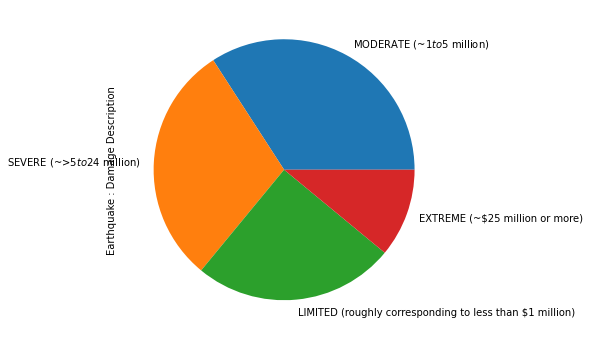

In [29]:
data["Earthquake : Damage Description"].value_counts().plot.pie(figsize=(6, 6))

In [30]:
data["Total Effects : Damage Description"].value_counts()

LIMITED (roughly corresponding to less than $1 million)    1041
MODERATE (~$1 to $5 million)                               1007
SEVERE (~>$5 to $24 million)                                778
EXTREME (~$25 million or more)                              467
Name: Total Effects : Damage Description, dtype: int64

<AxesSubplot:ylabel='Total Effects : Damage Description'>

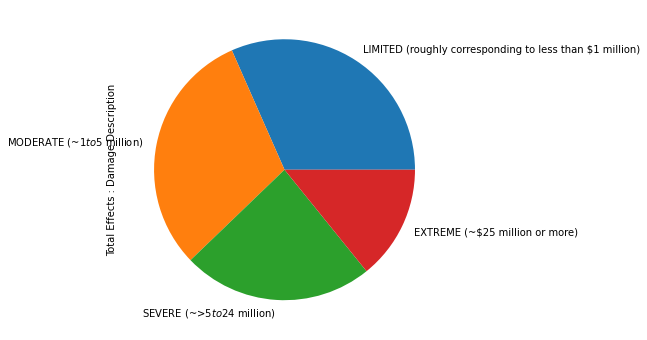

In [31]:
data["Total Effects : Damage Description"].value_counts().plot.pie(figsize=(6, 6))

In [32]:
data["Earthquake : Deaths Description"].value_counts()

Few (~1 to 50 deaths)               1312
Many (~101 to 1000 deaths)           607
Very Many (~1001 or more deaths)     368
Some (~51 to 100 deaths)             263
None                                   1
Name: Earthquake : Deaths Description, dtype: int64

<AxesSubplot:ylabel='Earthquake : Deaths Description'>

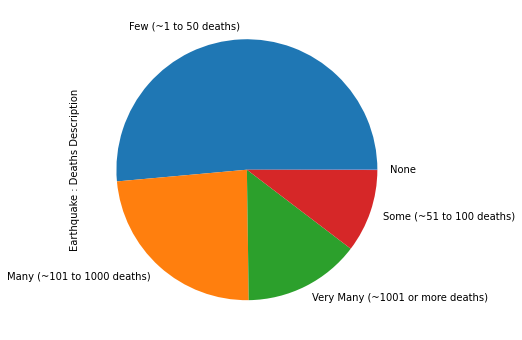

In [33]:
data["Earthquake : Deaths Description"].value_counts().plot.pie(figsize=(6, 6))

In [34]:
data[data["EQ Primary"].isna() & data["Focal Depth"].isna() & data["Intensity"].isna()]

,ID Earthquake,Flag Tsunami,Year,Month,Day,Focal Depth,EQ Primary,Mw Magnitude,Ms Magnitude,Mb Magnitude,...,Total Effects : Missing Description,Total Effects : Injuries,Total Effects : Injuries Description,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Total Effects : Houses Destroyed,Total Effects : Houses Destroyed Description,Total Effects : Houses Damaged,Total Effects : Houses Damaged Description,Coordinates
5,172,NaN,742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"35.0,38.0"
6,209,NaN,845,9.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"36.2,43.1"
7,7261,NaN,1118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EXTREME (~$25 million or more),NaN,NaN,NaN,NaN,NaN
8,411,NaN,1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"34.5,36.5"
9,513,NaN,1310,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),21829.0,Very Many (~1001 or more houses),NaN,NaN,"31.2,112.2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,2459,NaN,1894,11.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9.4,-70.1"
6071,10053,Tsunami,1897,9.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6075,6539,Tsunami,1899,11.0,25.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"31.9,132.0"
6082,9194,Tsunami,1905,3.0,19.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-15.6,167.2"


## Data cleaning / Feature Engineering

Because of the amount of missing values in most of the variables other than our target variables, we will just keep the following variables.  
We keep the `Intensity` variable because it is often used when `EQ Primary` and `Focal Depth` is missing. 

We don't keep `Total Effects : Damage Description` because we are working on CAT Bonds, which generally only covers EQ Damage.

In [35]:
vars = ["Flag Tsunami", "Year", "Focal Depth", "EQ Primary", "Intensity", "Country", "Region code", "Coordinates", "Earthquake : Damage Description"]

In [36]:
df = data[vars]

In [37]:
df[0::900]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
0,NaN,334,NaN,NaN,10.0,ALBANIA,130.0,"41.2,19.3",NaN
900,Tsunami,1657,NaN,NaN,NaN,INDONESIA,170.0,"-3.0,128.0",NaN
1800,Tsunami,1849,NaN,NaN,NaN,RUSSIA,50.0,"55.0,166.0",LIMITED (roughly corresponding to less than $1...
2700,NaN,1881,NaN,NaN,9.0,ITALY,130.0,"40.7,13.9",LIMITED (roughly corresponding to less than $1...
3600,Tsunami,1932,17.0,NaN,7.0,INDONESIA,170.0,"-3.57,128.35",SEVERE (~>$5 to $24 million)
4500,Tsunami,1900,NaN,7.1,NaN,PAPUA NEW GUINEA,170.0,"-5.0,148.0",NaN
5400,NaN,2010,20.0,6.2,NaN,MEXICO,150.0,"16.396,-97.782",NaN


We will encode the `Flag Tsunami` variable with 1's when a Tsunami occured and else 0.

In [38]:
df["Flag Tsunami"] = df["Flag Tsunami"].apply(lambda x: int(x is not np.nan))

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7492/2963108372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flag Tsunami"] = df["Flag Tsunami"].apply(lambda x: int(x is not np.nan))


In [39]:
df[0::900]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
0,0,334,NaN,NaN,10.0,ALBANIA,130.0,"41.2,19.3",NaN
900,1,1657,NaN,NaN,NaN,INDONESIA,170.0,"-3.0,128.0",NaN
1800,1,1849,NaN,NaN,NaN,RUSSIA,50.0,"55.0,166.0",LIMITED (roughly corresponding to less than $1...
2700,0,1881,NaN,NaN,9.0,ITALY,130.0,"40.7,13.9",LIMITED (roughly corresponding to less than $1...
3600,1,1932,17.0,NaN,7.0,INDONESIA,170.0,"-3.57,128.35",SEVERE (~>$5 to $24 million)
4500,1,1900,NaN,7.1,NaN,PAPUA NEW GUINEA,170.0,"-5.0,148.0",NaN
5400,0,2010,20.0,6.2,NaN,MEXICO,150.0,"16.396,-97.782",NaN


We will also remove rows where data is missing in `Earthquake : Damage Description`

In [40]:
df.dropna(subset=["Earthquake : Damage Description"], inplace=True)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [41]:
len(df)

4446

In [42]:
df[0::700]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
1,1,344,NaN,NaN,9.0,TURKEY,140.0,"40.3,26.5",SEVERE (~>$5 to $24 million)
986,1,1965,28.0,7.8,NaN,MEXICO,150.0,"16.3,-95.8",LIMITED (roughly corresponding to less than $1...
1942,0,2006,5.0,4.3,NaN,FRANCE,120.0,"45.84,-0.14",LIMITED (roughly corresponding to less than $1...
2942,1,1873,NaN,NaN,8.0,GREECE,130.0,"38.0,23.3",MODERATE (~$1 to $5 million)
3885,0,1990,10.0,6.1,NaN,PAKISTAN,60.0,"28.925,66.331",MODERATE (~$1 to $5 million)
4882,1,1590,40.0,7.7,7.0,PERU,160.0,"-17.2,-72.9",LIMITED (roughly corresponding to less than $1...
5863,1,1919,NaN,NaN,8.0,INDONESIA,170.0,"-2.55,140.75",LIMITED (roughly corresponding to less than $1...


We arrange some missing values

In [43]:
df[df["Region code"].isna()]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
3474,0,2019,10.0,3.2,NaN,NETHERLANDS,NaN,"53.394,6.586",MODERATE (~$1 to $5 million)


In [44]:
df[df["Country"] == "NETHERLANDS"]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
2399,0,2018,NaN,3.4,NaN,NETHERLANDS,120.0,"53.2,6.6",MODERATE (~$1 to $5 million)
3474,0,2019,10.0,3.2,NaN,NETHERLANDS,NaN,"53.394,6.586",MODERATE (~$1 to $5 million)
5364,0,1992,21.0,5.2,8.0,NETHERLANDS,120.0,"51.153,5.798",EXTREME (~$25 million or more)


In [45]:
df.loc[df["Region code"].isna(), "Region code"] = 120.0

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [46]:
df[df["Region code"].isna()]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description


In [47]:
df[0::700]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
1,1,344,NaN,NaN,9.0,TURKEY,140.0,"40.3,26.5",SEVERE (~>$5 to $24 million)
986,1,1965,28.0,7.8,NaN,MEXICO,150.0,"16.3,-95.8",LIMITED (roughly corresponding to less than $1...
1942,0,2006,5.0,4.3,NaN,FRANCE,120.0,"45.84,-0.14",LIMITED (roughly corresponding to less than $1...
2942,1,1873,NaN,NaN,8.0,GREECE,130.0,"38.0,23.3",MODERATE (~$1 to $5 million)
3885,0,1990,10.0,6.1,NaN,PAKISTAN,60.0,"28.925,66.331",MODERATE (~$1 to $5 million)
4882,1,1590,40.0,7.7,7.0,PERU,160.0,"-17.2,-72.9",LIMITED (roughly corresponding to less than $1...
5863,1,1919,NaN,NaN,8.0,INDONESIA,170.0,"-2.55,140.75",LIMITED (roughly corresponding to less than $1...


In [48]:
df.isna().sum()

Flag Tsunami                          0
Year                                  0
Focal Depth                        2033
EQ Primary                         1114
Intensity                          2230
Country                               0
Region code                           0
Coordinates                          18
Earthquake : Damage Description       0
dtype: int64

Let's check if there are still some rows with both explanatory variables `EQ Primary`, `Intensity` and `Focal Depth` Nan.

In [49]:
df[df["EQ Primary"].isna() & df["Focal Depth"].isna() & df["Intensity"].isna()]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
5,0,742,NaN,NaN,NaN,SYRIA,140.0,"35.0,38.0",SEVERE (~>$5 to $24 million)
7,0,1118,NaN,NaN,NaN,UK,120.0,NaN,EXTREME (~$25 million or more)
9,0,1310,NaN,NaN,NaN,CHINA,30.0,"31.2,112.2",SEVERE (~>$5 to $24 million)
12,0,1444,NaN,NaN,NaN,BULGARIA,110.0,"43.2,27.9",SEVERE (~>$5 to $24 million)
16,0,1582,NaN,NaN,NaN,ITALY,130.0,"40.6,14.1",MODERATE (~$1 to $5 million)
...,...,...,...,...,...,...,...,...,...
6060,0,1879,NaN,NaN,NaN,EL SALVADOR,100.0,"13.4,-89.1",MODERATE (~$1 to $5 million)
6062,0,1880,NaN,NaN,NaN,IRAN,140.0,"27.1,54.2",MODERATE (~$1 to $5 million)
6066,0,1887,NaN,NaN,NaN,MEXICO,150.0,"17.7,-100.0",SEVERE (~>$5 to $24 million)
6070,0,1894,NaN,NaN,NaN,VENEZUELA,160.0,"9.4,-70.1",MODERATE (~$1 to $5 million)


We have still 565 earthquakes without explanatory variables... These are quite old earthquake and we will get rid of them.

In [50]:
df.dropna( how='all', subset=['EQ Primary', 'Focal Depth', 'Intensity'], inplace=True)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [51]:
df[df["EQ Primary"].isna() & df["Focal Depth"].isna() & df["Intensity"].isna()]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description


In [52]:
df[0::700]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
1,1,344,NaN,NaN,9.0,TURKEY,140.0,"40.3,26.5",SEVERE (~>$5 to $24 million)
1167,1,1927,NaN,5.8,NaN,USA,150.0,"32.5,-115.5",MODERATE (~$1 to $5 million)
2234,0,1738,NaN,5.1,8.0,CROATIA,130.0,"46.45,16.39",MODERATE (~$1 to $5 million)
3377,0,1940,NaN,5.8,8.0,CHINA,30.0,"40.2,122.0",SEVERE (~>$5 to $24 million)
4445,0,1736,NaN,6.0,8.0,TAIWAN,30.0,"23.1,120.3",MODERATE (~$1 to $5 million)
5582,0,1991,22.0,5.0,NaN,INDIA,60.0,"26.323,70.607",LIMITED (roughly corresponding to less than $1...


In [53]:
len(df)

3881

In [54]:
df.isna().sum()

Flag Tsunami                          0
Year                                  0
Focal Depth                        1468
EQ Primary                          549
Intensity                          1665
Country                               0
Region code                           0
Coordinates                           4
Earthquake : Damage Description       0
dtype: int64

In [55]:
df[df.Coordinates.isna()]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
2745,0,1945,NaN,6.0,9.0,UGANDA,10.0,NaN,MODERATE (~$1 to $5 million)
3605,1,1935,33.0,7.9,8.0,INDONESIA,60.0,NaN,MODERATE (~$1 to $5 million)
3840,1,1939,150.0,8.0,NaN,INDONESIA,170.0,NaN,MODERATE (~$1 to $5 million)
5082,0,-177,100.0,NaN,NaN,ITALY,130.0,NaN,MODERATE (~$1 to $5 million)


We manually add coordinates data

In [56]:
df.iloc[df.index == 3840, 7] = '0.0, 121.1'

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [57]:
df.iloc[df.index == 3605, 7] = '0.0, 98.25'

In [58]:
df.iloc[df.index == 2745, 7] = '-0.06, 31.48'

In [59]:
df.drop([5082], inplace=True)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
df[df.Coordinates.isna()]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description


(array([2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 8.000e+00, 3.300e+01,
        5.400e+01, 8.700e+01, 1.780e+02, 3.514e+03]),
 array([-2150., -1733., -1316.,  -899.,  -482.,   -65.,   352.,   769.,
         1186.,  1603.,  2020.]),
 <BarContainer object of 10 artists>)

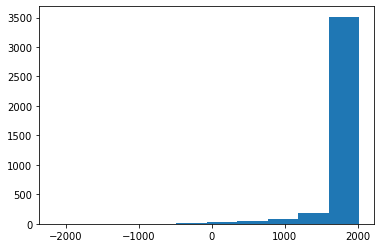

In [61]:
plt.hist(df.Year)

In [65]:
df.isna().sum()

Flag Tsunami                          0
Year                                  0
Focal Depth                        1468
EQ Primary                          548
Intensity                          1664
Country                               0
Region code                           0
Coordinates                           0
Earthquake : Damage Description       0
dtype: int64

In [66]:
df.to_csv("significant_eq_database_cleaned.csv")

In [63]:
df[-8:]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
6197,0,2015,10.0,6.0,6.0,MALAYSIA,170.0,"5.987,116.541",LIMITED (roughly corresponding to less than $1...
6199,1,2015,11.0,6.5,NaN,GREECE,130.0,"38.67,20.6",MODERATE (~$1 to $5 million)
6201,0,2016,126.0,7.1,6.0,USA,150.0,"59.658,-153.452",LIMITED (roughly corresponding to less than $1...
6202,0,2016,8.0,5.5,6.0,PERU,160.0,"-15.64,-71.68",MODERATE (~$1 to $5 million)
6203,1,2017,26.0,6.9,9.0,PHILIPPINES,170.0,"5.504,125.066",LIMITED (roughly corresponding to less than $1...
6204,0,2017,39.0,7.1,9.0,MEXICO,150.0,"18.339,-98.68",EXTREME (~$25 million or more)
6206,0,2019,10.0,3.8,NaN,INDIA,60.0,"20.0,72.9",LIMITED (roughly corresponding to less than $1...
6207,0,2020,10.0,6.6,7.0,PHILIPPINES,170.0,"12.021,124.123",LIMITED (roughly corresponding to less than $1...


In [64]:
df[df.Year > 2000]

,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
168,0,2002,17.0,4.8,NaN,GERMANY,120.0,"50.889,6.103",LIMITED (roughly corresponding to less than $1...
169,0,2003,18.0,5.2,NaN,GREECE,130.0,"39.893,22.309",LIMITED (roughly corresponding to less than $1...
170,0,2003,33.0,4.7,NaN,CHINA,30.0,"27.283,103.753",EXTREME (~$25 million or more)
173,0,2005,11.0,6.3,NaN,INDONESIA,170.0,"-1.198,119.933",MODERATE (~$1 to $5 million)
174,0,2005,15.0,4.8,NaN,INDONESIA,60.0,"-7.037,107.819",MODERATE (~$1 to $5 million)
...,...,...,...,...,...,...,...,...,...
6202,0,2016,8.0,5.5,6.0,PERU,160.0,"-15.64,-71.68",MODERATE (~$1 to $5 million)
6203,1,2017,26.0,6.9,9.0,PHILIPPINES,170.0,"5.504,125.066",LIMITED (roughly corresponding to less than $1...
6204,0,2017,39.0,7.1,9.0,MEXICO,150.0,"18.339,-98.68",EXTREME (~$25 million or more)
6206,0,2019,10.0,3.8,NaN,INDIA,60.0,"20.0,72.9",LIMITED (roughly corresponding to less than $1...
